# Testes de Normalidade

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

sns.set()
pd.set_option('display.max_columns', None)

In [39]:
df = pd.read_csv('../dataset_limpo/survey_results_public_clean.csv', sep=',', encoding='utf-8')
df.head()

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber
0,0,1,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,1,2,dev,employed_full_time,remote,hobby;open_source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,canada,CAD,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,Very unfavorable,daily,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2,3,part_dev,employed_full_time,hybrid,hobby,master,books;someone;other_online_resources,technical_documentation;blogs;programming_game...,NaN,14,5,data_scientist_or_machine_learning_specialist;...,20 to 99 employees,united_kingdom_of_great_britain_and_northern_i...,GBP,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,multiple_day,25-34 years old,man,no,bisexual,white,none,emotional;anxiety,NaN,NaN,NaN,NaN,NaN,40205.0,14.0,5.0
3,3,4,dev,employed_full_time,remote,i_dont_code_outside_of_work,bachelor,books;school,NaN,NaN,20,17,developer_full_stack,100 to 499 employees,israel,ILS,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,Jira Work Management;Trello,Jira Work Management;Trello,Slack;Zoom,Slack;Zoom,Very unfavorable,daily,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,215232.0,20.0,17.0
4,4,5,dev,employed_full_time,hybrid,hobby,bachelor,other_online_resources;job,technical_documentation;blogs;stack_overflow;o...,NaN,8,3,developer_front_end;developer_full_stack;devel...,20 to 99 employees,united_states_of_america,USD,NaN,NaN,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,Cloud Firestore;Elasticsearch;Microsoft SQL Se...,Cloud Firestore;Elasticsearch;Firebase Realtim...,Firebase;Microsoft Azure,Firebase;Microsoft Azure,Angular;ASP.NET;ASP.NET Core ;jQuery;Node.js,Angular;ASP.NET Core ;Blazor;Node.js,.NET,.NET;Apache Kafka,npm,Docker;Kubernetes,Notepad++;Visual Studio;Visual Studio Code;Xcode,Rider;Visual Studio;Visual Studio Code,Windows,macOS;Windows,Git;Other (please specify):,Code editor,NaN,NaN,Microsoft Teams;Zoom,NaN,Unfavorable,multiple_day,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      73268 non-null  int64  
 1   ResponseId                      73268 non-null  int64  
 2   MainBranch                      73268 non-null  object 
 3   Employment                      71709 non-null  object 
 4   RemoteWork                      58958 non-null  object 
 5   CodingActivities                58899 non-null  object 
 6   EdLevel                         71571 non-null  object 
 7   LearnCode                       71580 non-null  object 
 8   LearnCodeOnline                 50685 non-null  object 
 9   LearnCodeCoursesCert            29389 non-null  object 
 10  YearsCode                       71331 non-null  object 
 11  YearsCodePro                    51833 non-null  object 
 12  DevType                         

## Limpando linhas

In [41]:
df.isnull().sum(axis = 0)

Unnamed: 0                            0
ResponseId                            0
MainBranch                            0
Employment                         1559
RemoteWork                        14310
CodingActivities                  14369
EdLevel                            1697
LearnCode                          1688
LearnCodeOnline                   22583
LearnCodeCoursesCert              43879
YearsCode                          1937
YearsCodePro                      21435
DevType                           11966
OrgSize                           22229
Country                            1497
Currency                          22004
GrossWage                         34846
WageFreq                          28843
LanguageHaveWorkedWith             2293
LanguageWantToWorkWith             6241
DatabaseHaveWorkedWith            13147
DatabaseWantToWorkWith            22254
PlatformHaveWorkedWith            23344
PlatformWantToWorkWith            32853
WebframeHaveWorkedWith            19724


In [42]:
df = df[df['YearlyWageInDollar'].notna()]

In [43]:
df.isnull().sum(axis = 0)

Unnamed: 0                            0
ResponseId                            0
MainBranch                            0
Employment                            4
RemoteWork                           56
CodingActivities                     75
EdLevel                              17
LearnCode                            20
LearnCodeOnline                   11859
LearnCodeCoursesCert              22811
YearsCode                            70
YearsCodePro                        136
DevType                              82
OrgSize                              29
Country                               0
Currency                              0
GrossWage                             0
WageFreq                              0
LanguageHaveWorkedWith              111
LanguageWantToWorkWith             2018
DatabaseHaveWorkedWith             4746
DatabaseWantToWorkWith             9459
PlatformHaveWorkedWith             9198
PlatformWantToWorkWith            14365
WebframeHaveWorkedWith             8519


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      38071 non-null  int64  
 1   ResponseId                      38071 non-null  int64  
 2   MainBranch                      38071 non-null  object 
 3   Employment                      38067 non-null  object 
 4   RemoteWork                      38015 non-null  object 
 5   CodingActivities                37996 non-null  object 
 6   EdLevel                         38054 non-null  object 
 7   LearnCode                       38051 non-null  object 
 8   LearnCodeOnline                 26212 non-null  object 
 9   LearnCodeCoursesCert            15260 non-null  object 
 10  YearsCode                       38001 non-null  object 
 11  YearsCodePro                    37935 non-null  object 
 12  DevType                         

## Análise de outliers

In [45]:
df['YearlyWageInDollar'].describe()

count    3.807100e+04
mean     1.707613e+05
std      7.814132e+05
min      1.000000e+00
25%      3.583200e+04
50%      6.784500e+04
75%      1.200000e+05
max      5.000000e+07
Name: YearlyWageInDollar, dtype: float64

In [46]:
px.box(df, x ='YearlyWageInDollar')

In [47]:
df_outliers = df[df['YearlyWageInDollar'] >= 18000000]
df_outliers

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber
201,201,202,dev,employed_full_time,hybrid,hobby;business,bachelor,other_online_resources;job;online_course,technical_documentation;blogs;written_tutorial...,coursera;udemy;edx,9,6,developer_front_end,"10,000 or more employees",portugal,EUR,42000044.0,Yearly,JavaScript;TypeScript,JavaScript;TypeScript,MariaDB;MongoDB,MongoDB,AWS;Firebase,AWS,Angular;Node.js;React.js;Svelte,Angular;Gatsby;Next.js;Node.js;React.js;Svelte...,NaN,NaN,npm,Ansible;Docker;Kubernetes;npm;Terraform,Visual Studio Code,Visual Studio Code,macOS;Windows,macOS;Windows,Git,Code editor;Command-line,Confluence;Jira Work Management,Confluence;Jira Work Management,Cisco Webex Teams,Slack,Very favorable,weekly,25-34 years old,woman,no,heterosexual,white;european;hispanic_or_latino,seeing,emotional;anxiety;concentration,independent_contributor,2.0,30-60 minutes a day,Less than 15 minutes a day,innersource_initiative;devops_function;microse...,44790396.0,9.0,6.0
18922,18922,18923,dev,employed_full_time,hybrid,hobby,bachelor,books;someone;school;job;online_course;colleague,NaN,coursera;edx;udacity,36,21,engineer_data;developer_back_end;cloud_infrast...,"1,000 to 4,999 employees",united_states_of_america,USD,450000.0,Weekly,Python;Scala,NaN,DynamoDB;PostgreSQL,NaN,AWS,NaN,NaN,NaN,NumPy;Pandas,NaN,NaN,NaN,IntelliJ;RStudio,NaN,NaN,Windows,Git,Dedicated version control GUI application,Jira Work Management,NaN,Cisco Webex Teams;Google Chat;Slack,NaN,Very favorable,multiple_day,35-44 years old,man,no,heterosexual,hispanic_or_latino;indigenous_,none,autism,NaN,NaN,NaN,NaN,NaN,22500000.0,36.0,21.0
40304,40304,40305,dev,independent,in_person,freelance,high_school,other_online_resources,blogs;stack_overflow;online_books;video_based_...,NaN,Less than 1 year,2,engineer_data;engineer_site_reliability;develo...,"5,000 to 9,999 employees",united_kingdom_of_great_britain_and_northern_i...,USD,1000000.0,Weekly,APL;Assembly;Bash/Shell;C;C#;C++;COBOL;Crystal...,NaN,Cassandra;Couchbase;CouchDB;Cloud Firestore;Dy...,NaN,AWS;Colocation;Firebase;Google Cloud;Heroku;IB...,NaN,Angular;Angular.js;ASP.NET;ASP.NET Core ;Blazo...,NaN,.NET;Apache Kafka;Capacitor;Cordova;Electron;F...,NaN,Ansible;Chef;Docker;Flow;Homebrew;Kubernetes;n...,NaN,Android Studio;Atom;CLion;Eclipse;Emacs;GoLand...,NaN,Other (please specify):,Linux-based;macOS;Windows;Windows Subsystem fo...,Git;Other (please specify):;Mercurial;SVN,Code editor;Command-line;Version control hosti...,Adobe Workfront;Airtable;Asana;Cerri;ClickUp;C...,NaN,Cisco Webex Teams;Coolfire Core;Google Chat;Ma...,NaN,Very favorable,daily,25-34 years old,opt_out,prefer_not_to_say,opt_out,central_asian,opt_out,opt_out,independent_contributor,11.0,60-120 minutes a day,60-120 minutes a day,innersource_initiative;devops_function;develop...,50000000.0,0.0,2.0
61043,61043,61044,dev,opt_out,NaN,NaN,primary_school,job;online_course;other,NaN,skillsoft,Less than 1 year,Less than 1 year,NaN,"Just me - I am a freelancer, sole proprietor, ...",thailand,THB,985692510.0,Yearly,Go;HTML/CSS;Java;JavaScript;Objective-C;Swift;...,APL;Go;HTML/CSS;Java;Ja

In [48]:
# removendo o responseId 61044, pois não parece realista alguém com menos de 1 ano de experiência na Tailândia recebendo $28M
# mesmo caso com os 40305, 62027 e 202. pouco tempo de experiência e mercado para isso.

# removemos o 70523 por incompatibilidade de dados entre Employment e OrgSize

# removemos também 18923, 62224 e 66496 porque o salário inserido é visivelmente o valor anual, 
# e parece ter sido um erro de interpretação ao responder que é recebido semanalmente

responses_deletar = [61044, 40305, 62027, 202, 70523, 18923, 62224, 66496]
df_limpa = df[~df.ResponseId.isin(responses_deletar)]

px.box(df_limpa, x ='YearlyWageInDollar')

Observamos que ainda assim, existem casos de salários milionários demais. Sustentando a teoria, vamos cruzar quantos desses foram configurados como "Weekly", pois isso está parecendo uma confusão recorrente entre os estadunidenses. 

In [49]:
df_mil_outliers = df[df['YearlyWageInDollar'] >= 1000000]
print("Milionários: " + str(len(df_mil_outliers)))
df_mil_outliers = df_mil_outliers[df_mil_outliers['WageFreq'] != 'Yearly']
print("Milionários com WageFreq diferentes: " + str(len(df_mil_outliers)))

Milionários: 873
Milionários weekly: 839


In [50]:
len(df_limpa)

38063

In [51]:
# removendo os "falsos milionários"
df_limpa = pd.merge(df_limpa, df_mil_outliers, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
len(df_limpa)

37230

In [53]:
# excluido casos com menos de 1 ano de trabalho
df_limpa = df_limpa[df_limpa['YearsCodeProNumber'] > 0]

In [54]:
px.box(df_limpa, x ='YearlyWageInDollar')

Vamos repetir a análise manual, agora com os que recebem mais que 6M

In [56]:
df_outliers = df_limpa[df_limpa['YearlyWageInDollar'] >= 6000000]
df_outliers

,Unnamed: 0,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,Country,Currency,GrossWage,WageFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessionalUse,OpSysPersonalUse,VersionControlSystem,VCInteraction,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,SOVisitFreq,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,ICorPM,WorkExp,TimeSearching,TimeAnswering,ProfessionalTech,YearlyWageInDollar,YearsCodeNumber,YearsCodeProNumber
66,117,118,dev,employed_full_time;independent,remote,i_dont_code_outside_of_work,unfinished_college,books;job,NaN,NaN,32,28,data_scientist_or_machine_learning_specialist;...,10 to 19 employees,united_states_of_america,USD,6000000.0,Yearly,C#,C#,NaN,NaN,Microsoft Azure,Microsoft Azure,NaN,NaN,.NET,.NET,NaN,NaN,Notepad++;Sublime Text;Visual Studio;Visual St...,Notepad++;Sublime Text;Visual Studio;Visual St...,Linux-based;Windows,Windows,Git,Code editor;Command-line,NaN,NaN,Microsoft Teams;Slack,Microsoft Teams;Slack,Very unfavorable,monthly,45-54 years old,man,no,heterosexual,opt_out,none,none,independent_contributor,28.0,15-30 minutes a day,15-30 minutes a day,devops_function;microservices;continuous_integ...,6000000.0,32.0,28.0
1121,1888,1889,dev,independent,remote,i_dont_code_outside_of_work,bachelor,books;other,NaN,NaN,30,15,other,"Just me - I am a freelancer, sole proprietor, ...",united_states_of_america,USD,12000000.0,Yearly,Bash/Shell;C++;HTML/CSS;Java;Python;SQL,Bash/Shell;Java;Python,MariaDB;PostgreSQL;Redis,PostgreSQL;Redis,AWS;Colocation;Managed Hosting,AWS;Colocation;Managed Hosting,NaN,NaN,NumPy;Pandas;Scikit-learn,NumPy,Docker;Terraform,NaN,IntelliJ;IPython/Jupyter;PyCharm;Vim;Visual St...,IntelliJ;IPython/Jupyter;PyCharm;Vim,Linux-based;Windows Subsystem for Linux (WSL),macOS,Git,Command-line,NaN,NaN,Cisco Webex Teams;Microsoft Teams,NaN,Unfavorable,multiple_week,35-44 years old,man,no,heterosexual,white,none,none,NaN,NaN,NaN,NaN,NaN,12000000.0,30.0,15.0
21458,41231,41232,dev,employed_full_time,hybrid,hobby;open_source,master,books;other_online_resources;online_course,technical_documentation;stack_overflow;online_...,coursera,32,32,developer_full_stack;developer_desktop_or_ente...,20 to 99 employees,new_zealand,NZD,14500000.0,Yearly,C#;Delphi;Java;Python,Delphi;Go;Python;Ruby,Microsoft SQL Server;MySQL,MySQL,NaN,NaN,NaN,NaN,NaN,NaN,Docker,Docker,"Atom;PyCharm;RAD Studio (Delphi, C++ Builder);...","PyCharm;RAD Studio (Delphi, C++ Builder);Visua...",Linux-based;Windows,Linux-based,Git,Command-line;Dedicated version control GUI app...,Confluence;Jira Work Management,Confluence;Jira Work Management,Microsoft Teams;Slack;Zoom,Microsoft Teams;Slack,Very favorable,multiple_week,55-64 years old,man,no,heterosexual,south_american,none,none,people_manager,32.0,Over 120 minutes a day,Less than 15 minutes a day,none,9328340.0,32.0,32.0
34186,64897,64898,dev,employed_full_time,remote,hobby,bachelor,books;other_online_resources;online_course,technical_documentation;blogs;written_tutorial...,udemy,26,7,developer_back_end,500 to 999 employees,india,INR,510000000.0,Yearly,Go;JavaScript,C;C++;Go;Java;Rust,Oracle,Couchbase;PostgreSQL,NaN,NaN,React.js,NaN,NaN,NaN,NaN,NaN,IntelliJ,IntelliJ,macOS,macOS,Git,Command-line,Jira Work Management,Jira Work Management,Microsoft Teams;Slack,Slack,Unsure,daily,35-44 years old,man,no,heterosexual,indian,none,emotional,independent_contributor,7.0,30-60 minutes a day,Less than 15 minutes a day,devops_function;continuous_integration__contin...,6577582.0,26.0,7.0


Julgamos estes registros como válidos por ora, então vamos mantê-los.

## Análise de normalidade

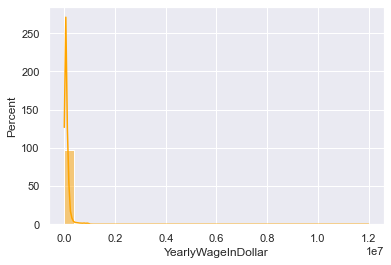

In [63]:
df_aux1 = df_limpa
sns.histplot(df_aux1, x='YearlyWageInDollar', bins=32, color="orange", kde=True, stat="percent");

# histograma

In [64]:
df_aux1.shape

(35720, 57)

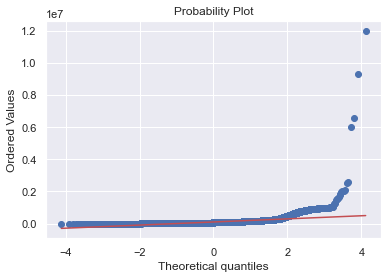

In [58]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df_aux1['YearlyWageInDollar'], dist="norm", plot=plt)
plt.show()

# qqplot

In [59]:
stats.shapiro(df_aux1.sample(5000).YearlyWageInDollar) # nota: com samples menores de 2000 começa a ter muita variação no p-value (a cada vez que rodamos o código), não sei o que isso significa. mas acima de 2000 sempre vai pra 0, e statistic tem uma variacao menor

ShapiroResult(statistic=0.1763073205947876, pvalue=0.0)

In [60]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(df_aux1.YearlyWageInDollar, dist = 'norm')

# não entendi como interpretar isso

(0.2585965385565816, 0.0009999999999998899)

In [62]:
# teste mann-whitney
# pelo que entendi quado os dados não são normais (ver acima) precisamos usar testes não paramétricos, no caso o slide dizia pra usar mann-whitney

# mas os valores estão estranhos, não entendi por que stat tá sempre tão alto e p sempre tão baixo... no caso aqui to tentando comparar salários entre países pra ver se há uma diferença grande entre as medianas...

stat, p = stats.mannwhitneyu(df_aux1[df_aux1['Country'] == 'brazil'].YearlyWageInDollar, df_aux1[df_aux1['Country'] == 'india'].YearlyWageInDollar)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 1514961.5
p-valor: 6.981578586601467e-30


In [ ]:
stat, p = stats.mannwhitneyu(df_aux1[df_aux1['Country'] == 'united_states_of_america'].YearlyWageInDollar, df_aux1[df_aux1['Country'] == 'canada'].YearlyWageInDollar)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 8114775.0
p-valor: 2.6026325080465607e-172


comparando com boxplots, a diferença visual maior corresponde com p-value mais baixo, não sei se isso é útil

In [ ]:
px.box(df_aux1[df_aux1['Country'].isin(['brazil', 'india'])], x ='YearlyWageInDollar', y="Country")

In [ ]:
px.box(df_aux1[df_aux1['Country'].isin(['united_states_of_america', 'canada'])], x ='YearlyWageInDollar', y="Country")

## Aplicando técnicas de normalização

The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value. We can apply the maximum absolute scaling in Pandas using the .max() and .abs() methods, as shown below.

https://www.geeksforgeeks.org/normalize-a-column-in-pandas/

In [ ]:
column = 'YearlyWageInDollar'
df_aux1[column] = df_aux1[column] /df_aux1[column].abs().max()